In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from epde.interface.prepared_tokens import CustomTokens, TrigonometricTokens, CacheStoredTokens
from epde.evaluators import CustomEvaluator
import epde.interface.interface as epde_alg
from epde.preprocessing.deriv_calculators import SpectralDeriv, PolynomialDeriv
from sympy import *
from sympy.abc import x

In [4]:
f = lambdify(x, (0.072357460529242*sin(1.72753437013566*x) + 1.0*cos(1.72753437013566*x))*exp(-0.125*x))
df = ((0.072357460529242*sin(1.72753437013566*x) + 1.0*cos(1.72753437013566*x))*exp(-0.125*x)).diff(x)
df2 = df.diff(x)
df = lambdify(x, df)
df2 = lambdify(x, df2)
f = np.vectorize(f)
df = np.vectorize(df)
df2 = np.vectorize(df2)

In [5]:
def fitness_value_extractor_1d(history):
    
        """Выделяет значения функции приспособленности из каждого поколения сохраненной истории
    поколений для диффуров с одной независимой переменной"""
        
    clear_hiss = []
    for i in history:
        if i == []:
            continue
        else:
            clear_hiss.append(i)
    hist = []
    eq_hist = []
    for i in clear_hiss:
        eq_hist=np.array([])
        for j in i:
            x = [u.value for u in j.vals.chromosome.values()][:1]
            x = np.array([u.fitness_value for u in x])
            eq_hist = np.append(eq_hist, x)
        hist.append(np.amin(eq_hist))  
    return np.array(hist).T

def fitness_value_extractor(history):
    
            """Выделяет значения функции приспособленности из каждого поколения сохраненной истории
    поколений для диффуров с несколькими независимыми переменными"""
        
    clear_hiss = []
    for i in history:
        if i == []:
            continue
        else:
            clear_hiss.append(i)
    hist = []
    eq_hist = []
    for i in clear_hiss:
        eq_hist=np.array([])
        for j in i:
            x = [u.value for u in j.vals.chromosome.values()][:2]
            x = np.array([u.fitness_value for u in x])
            eq_hist = np.append(eq_hist, x)
        hist.append(eq_hist.reshape((eq_hist.size//2,2)))
    for i in hist:
        if len(i.shape) == 1:
            continue
        else:
            i = i.T
            i[0] = np.amin(i[0])
            i[1] = np.amin(i[1])    
    for i in range(len(hist)):
        hist[i] = hist[i][0]
    return np.array(hist).T

In [6]:
#ОДУ

%%time
t = np.linspace(0,10,1000)
v = f(t)#+np.random.normal(0, 0.01, t.size)
hiss = []
one_stage_hiss = []
for i in np.arange(50,1000,50)[::-1]:
    one_stage_hiss = []
    minn = np.array([])
    print(str(i)*10)
    for j in range(10):
        print(str(j)*50)
        epde_search_obj3 = epde_alg.epde_search(use_solver = False, dimensionality = 0, boundary = 10 ,coordinate_tensors = [t,],
                                                verbose_params = {'show_moeadd_epochs' : False})
        custom_grid_tokens = CacheStoredTokens(token_type = 'grid',
                                        token_labels = ['t'],
                                        token_tensors = {'t' : t},
                                        params_ranges = {'power' : (1, 1)},
                                        params_equality_ranges = None)
        trig_tokens = TrigonometricTokens(dimensionality = 0)
        factors_max_number = {'factors_num' : [1, 2], 'probas' : [0.8, 0.2]}
        epde_search_obj3.set_moeadd_params(population_size=4, training_epochs = 15)
        epde_search_obj3.set_preprocessor(default_preprocessor_type='poly', preprocessor_kwargs={'polynomial_window':i})
        epde_search_obj3.fit(data = v, max_deriv_order=2,  equation_terms_max_number = 4, equation_factors_max_number = factors_max_number,coordinate_tensors = [t,],
                            eq_sparsity_interval = (1e-8, 1),additional_tokens = [trig_tokens, custom_grid_tokens])
#         epde_search_obj3.equation_search_results(only_print = True)
        one_stage_hiss.append(epde_search_obj3.optimizer.history)
    for k in one_stage_hiss:
        print(type(fitness_value_extractor_1d(k)))
        print(fitness_value_extractor_1d(k))
        if set(fitness_value_extractor_1d(k)) == set():
            continue
        minn = np.append(minn, np.amin(fitness_value_extractor_1d(k)))
    hiss.append(minn)

950950950950950950950950950950
00000000000000000000000000000000000000000000000000
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299F81889A0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299F81889A0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [1.0067774e-08]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [1.63972681e-05]
Creating new equation, sparsity value [0.00906452]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [

initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.00776328]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [3.18013467e-05]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [5.99693921e-07]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [1.80796459e-05]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
88888888888888888888888888888888888888888888888888
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB8229A0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserB

initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [2.77132669e-07]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [1.33472658e-05]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.00856615]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [2.61996647e-08]
Creating new equation, sparsity value [0.11375671]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
44444444444444444444444444444444444444444444444444
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FC1B03A0>
setting builder with 

initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.00027034]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [1.246135e-06]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [1.03947222e-06]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [3.05776787e-05]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
11111111111111111111111111111111111111111111111111
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB8E1850>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBui

The optimization has been conducted.
88888888888888888888888888888888888888888888888888
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299F9487550>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299F9487550>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.31298119]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.00101488]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.09534564]
New solution accepted, confirmed 3/4 sol

The optimization has been conducted.
55555555555555555555555555555555555555555555555555
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FC120CA0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FC120CA0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.08466473]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [1.00573074e-08]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.00055555]
New solution accepted, confirmed 3/4

The optimization has been conducted.
11111111111111111111111111111111111111111111111111
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB779820>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB779820>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [6.99154743e-07]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.07026095]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [1.41987001e-07]
New solution accepted, confirmed

initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.00027778]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [1.20299751e-05]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.00258701]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [1.07732379e-07]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
99999999999999999999999999999999999999999999999999
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FBFF3B20>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuild

The optimization has been conducted.
55555555555555555555555555555555555555555555555555
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB5138E0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB5138E0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [1.66935864e-05]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [2.53243368e-06]
Creating new equation, sparsity value [3.07092759e-07]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, spars

initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.0064391]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.18978951]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [2.4445245e-07]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [5.56572021e-07]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
22222222222222222222222222222222222222222222222222
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299E9E03A00>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder

The optimization has been conducted.
99999999999999999999999999999999999999999999999999
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FBD8D280>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FBD8D280>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.00032506]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.00779388]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.00139548]
New solution accepted, confirmed 3/4 sol

The optimization has been conducted.
55555555555555555555555555555555555555555555555555
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB64F0A0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB64F0A0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.00444637]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [1.49967433e-06]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.00027088]
New solution accepted, confirmed 3/4

initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.00013585]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.00018167]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.0005019]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [1.00079852e-08]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
22222222222222222222222222222222222222222222222222
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299F8033D00>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder ob

The optimization has been conducted.
99999999999999999999999999999999999999999999999999
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299F9494640>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299F9494640>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.03507588]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.24112594]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [1.55450127e-06]
New solution accepted, confirmed 3/4

The optimization has been conducted.
66666666666666666666666666666666666666666666666666
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB5E1DF0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB5E1DF0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.0001176]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.00086415]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.0006795]
New solution accepted, confirmed 3/4 solut

The optimization has been conducted.
33333333333333333333333333333333333333333333333333
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FBCF1EB0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FBCF1EB0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [3.24895431e-05]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.02310301]
Creating new equation, sparsity value [0.00188442]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity valu

initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [1.48252512e-06]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.00657368]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [2.67629792e-05]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [0.0022534]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
11111111111111111111111111111111111111111111111111
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299E9E143D0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilde

The optimization has been conducted.
88888888888888888888888888888888888888888888888888
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB7489A0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB7489A0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.0002978]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.00014148]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.06354148]
New solution accepted, confirmed 3/4 solu

The optimization has been conducted.
44444444444444444444444444444444444444444444444444
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299F945ECD0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299F945ECD0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [5.76454834e-05]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.00196765]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.00123126]
New solution accepted, confirmed 3/4

The optimization has been conducted.
11111111111111111111111111111111111111111111111111
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FBE81A90>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FBE81A90>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.00095878]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.0006549]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.46472584]
New solution accepted, confirmed 3/4 solu

initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [7.56508314e-07]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [3.63430334e-07]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [9.31904957e-05]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [0.67677692]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
99999999999999999999999999999999999999999999999999
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB51EDF0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserB

The optimization has been conducted.
55555555555555555555555555555555555555555555555555
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB56C280>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FB56C280>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [2.89212019e-05]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [1.63087502e-07]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.04919274]
New solution accepted, confirmed

initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.67133434]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [1.41960816e-06]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [4.61881277e-05]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [0.05178841]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
22222222222222222222222222222222222222222222222222
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FC095220>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuild

The optimization has been conducted.
99999999999999999999999999999999999999999999999999
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FBC008B0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FBC008B0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.01816821]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.00734439]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [2.25832191e-08]
New solution accepted, confirmed 3/4

The optimization has been conducted.
55555555555555555555555555555555555555555555555555
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FBC90640>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FBC90640>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [2.20534625e-07]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [0.17897959]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [0.01049973]
New solution accepted, confirmed 3/4

The optimization has been conducted.
11111111111111111111111111111111111111111111111111
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FCAA3FD0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FCAA3FD0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0], [0, 0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.03144052]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [5.91549495e-05]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [1.59914505e-06]
New solution accepted, confirmed

initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.00248587]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [1.53233748e-08]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [2.6562082e-07]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [6.12462868e-08]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
99999999999999999999999999999999999999999999999999
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FC99B3A0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBu

initial_shape (1000,) derivs_tensor.shape (1000, 2)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0]}
['u', 'du/dx1', 'd^2u/dx1^2']
The cardinality of defined token pool is [3 2 1]
Among them, the pool contains [3]
Creating new equation, sparsity value [0.00012503]
New solution accepted, confirmed 1/4 solutions.
Creating new equation, sparsity value [3.16890273e-08]
New solution accepted, confirmed 2/4 solutions.
Creating new equation, sparsity value [8.35234241e-05]
New solution accepted, confirmed 3/4 solutions.
Creating new equation, sparsity value [0.05815924]
New solution accepted, confirmed 4/4 solutions.
best_obj 2
The optimization has been conducted.
55555555555555555555555555555555555555555555555555
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x00000299FC548370>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuild

{'whiskers': [<matplotlib.lines.Line2D at 0x1a9fc3b8730>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9fc3b8e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9fc3b83a0>,
 'medians': [<matplotlib.lines.Line2D at 0x1a9fc3c85b0>,
 'fliers': [],
 'means': []}

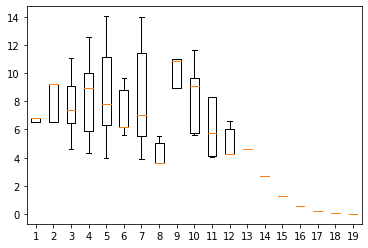

In [7]:
# hiss
plt.boxplot(ode_hiss,showfliers = False)

In [8]:
np.save('poly_ode_hiss.npy',hiss)

{'whiskers': [<matplotlib.lines.Line2D at 0x26d80643cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x26d80657430>,
 'boxes': [<matplotlib.lines.Line2D at 0x26d80643940>,
 'medians': [<matplotlib.lines.Line2D at 0x26d80657b50>,
 'fliers': [],
 'means': []}

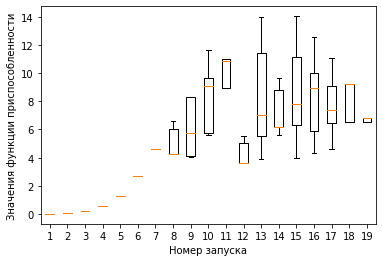

In [10]:
ode_hiss = np.load('poly_ode_hiss.npy', allow_pickle = True)
plt.ylabel("Значения функции приспособленности")
plt.xlabel('Номер запуска')
plt.boxplot(ode_hiss[::-1],showfliers = False)

In [15]:
pd = PolynomialDeriv()

In [16]:
x = np.linspace(0, 10, 1000)
func = f(x)
dfunc = df(x)
df2unc = df2(x)

In [18]:
%%time
err_pd_1=[]
err_pd_2=[]
for i in np.arange(3,1000,20)[::-1]:
    p= pd(data = func,grid = [x],max_order = 2, mp_poolsize = 5, polynomial_window = i, poly_order = None)
    err1 = np.linalg.norm(dfunc[100:900]-p.T[0][100:900])
    err2 = np.linalg.norm(dfunc[100:900]-p.T[1][100:900])
    err_pd_1.append(err1)
    err_pd_2.append(err2)
err_1 = np.array(err_pd_1)
err_2 = np.array(err_pd_2)

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Wall time: 4min 50s


In [2]:
err_1 = np.load('poly_ode_data_1.npy')
err_2 = np.load('poly_ode_data_2.npy')

In [6]:
err_1

array([7.82467475e-01, 7.82429203e-01, 1.32435548e+00, 1.32424826e+00,
       1.70158701e+00, 1.70139718e+00, 2.00914239e+00, 2.00885756e+00,
       2.27544376e+00, 2.27505309e+00, 2.51363116e+00, 2.51312506e+00,
       2.73106610e+00, 2.73043591e+00, 2.93236577e+00, 2.93160369e+00,
       3.12065260e+00, 3.11975148e+00, 3.29815539e+00, 3.29710868e+00,
       3.46653137e+00, 3.46533304e+00, 3.62705279e+00, 3.62569728e+00,
       3.78072184e+00, 3.77920398e+00, 3.92834482e+00, 3.92665985e+00,
       4.07058208e+00, 4.06872556e+00, 4.20798262e+00, 4.20595044e+00,
       4.34100881e+00, 4.33879714e+00, 4.47005447e+00, 4.46765975e+00,
       4.59545831e+00, 4.59287724e+00, 4.71751419e+00, 4.71474368e+00,
       4.83647900e+00, 4.83351619e+00, 4.95257886e+00, 4.94942107e+00,
       5.06601397e+00, 5.06265870e+00, 5.17696256e+00, 5.17340748e+00,
       5.28558404e+00, 5.28182698e+00, 5.39202163e+00, 5.38806054e+00,
       5.49640445e+00, 5.49223741e+00, 5.59884931e+00, 5.59447452e+00,
      

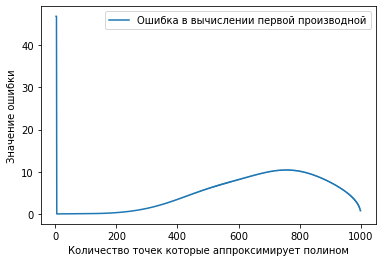

In [11]:
plt.plot(np.arange(3,1000,1)[::-1], err_1, label = "Ошибка в вычислении первой производной")
plt.ylabel('Значение ошибки')
plt.xlabel('Количество точек которые аппроксимирует полином')
plt.legend()

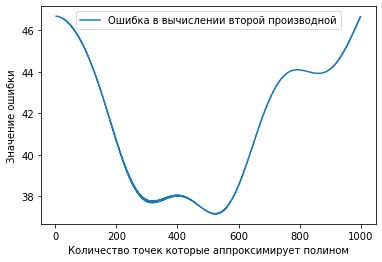

In [12]:
plt.plot(np.arange(3,1000,1)[::-1], err_2, label = "Ошибка в вычислении второй производной")
plt.ylabel('Значение ошибки')
plt.xlabel('Количество точек которые аппроксимирует полином')
plt.legend()

In [19]:
#Система ДУ

%%time
t = np.load('t.npy')
data = np.load('data.npy')
x = data[:, 0]; y = data[:, 1]
    # x += np.random.normal(0, err_factor*np.min(x), size = x.size)
    # y += np.random.normal(0, err_factor*np.min(y), size = y.size) 
dimensionality = x.ndim - 1
popsize = 7
hiss = []
for i in np.arange(50,1000,50)[::-1]:
    one_stage_hiss = []
    minn = np.array([])
    print(str(i)*10)
    for j in range(10):
        print(str(j)*30)
        epde_search_obj = epde_alg.epde_search(use_solver = False, dimensionality = dimensionality, boundary = 10,
                                                                       coordinate_tensors = [t,], verbose_params = {'show_moeadd_epochs' : True})    
        epde_search_obj.set_preprocessor(default_preprocessor_type='poly',
                                                                 preprocessor_kwargs={'polynomial_window':i})
        epde_search_obj.set_moeadd_params(population_size = popsize, training_epochs=25)
        trig_tokens = TrigonometricTokens(dimensionality = dimensionality)
        factors_max_number = {'factors_num' : [1, 2], 'probas' : [0.8, 0.2]}

        epde_search_obj.fit(data=[x, y], variable_names=['u', 'v'], max_deriv_order=(1,),
                                                    equation_terms_max_number=3, data_fun_pow = 1, additional_tokens=[trig_tokens,], 
                                                    equation_factors_max_number=factors_max_number,
                                                    eq_sparsity_interval=(1e-10, 1e-4), coordinate_tensors=[t, ])
        epde_search_obj.equation_search_results(only_print = True)
        one_stage_hiss.append(epde_search_obj.optimizer.history)
    for k in one_stage_hiss:
        if set(fitness_value_extractor(k)[0]) == set() or set(fitness_value_extractor(k)[1]) == set():
            continue
        print(np.amin(fitness_value_extractor(k)[0]))
        print(np.amin(fitness_value_extractor(k)[1]))
        minn = np.append(minn, [np.amin(fitness_value_extractor(k)[0]),np.amin(fitness_value_extractor(k)[1])])
    hiss.append(minn)

950950950950950950950950950950
000000000000000000000000000000
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67C761490>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67C761490>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.03528868e-05 2.88984207e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sp

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.4335331040198434 * du/dx1{power: 1.0} * u{power: 1.0} + -0.6063053546608967 * v{power: 1.0} + 0.17294786013448168 = du/dx1{

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67BAAF880>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67BAAF880>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.47654808e-05 1.70661128e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [4.13255175e-10 3.40197442e-10]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.4335331040198434 * du/dx1{power: 1.0} * u{power: 1.0} + -0.6063053546608967 * v{power: 1.0} + 0.17294786013448168 = du/dx1{power: 1.0}
 \ 0.588002304245307 * dv/dx1{power: 1.0} + 0.00204874972980

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.47016643e-06 8.42647869e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [9.48473777e-09 3.36975003e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [9.12286092e-05 2.50392349e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.72003467e-10 5.83051196e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.6063053546608966 * v{power: 1.0} + 0.43353310401984296 * du/dx1{power: 1.0} * u{power: 1.0} + 0.1729478601344816 = du/dx1{power: 1.0}
 \ -0.13592827027492707 * du/dx1{power: 1.0} + 0.2943043229287963 * u{power: 1.0} + -0.2923829104490227 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': Tru

Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.33589288e-07 8.93327521e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [4.11528857e-06 3.49733549e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [4.85692836e-09 1.09515587e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.31458350e-06 4.41881296e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.399146225962131 * u{power: 1.0} + -1.30337233996143 * u{power: 1.0} * v{power: 1.0} + -0.021363974830497012 = du/dx1{power: 1.0}
 \ 1.1438231186664272 * dv/dx1{power: 1.0} * v{power: 1.0} + 0.1370684522266118 * u{power: 1.0} + -0.1342131935673227 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00028072885426

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.97885296e-08 3.26027396e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.21767074e-10 5.98412773e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.60073468e-06 2.36778689e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [3.47773560e-07 4.90282223e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.6063053546608966 * v{power: 1.0} + 0.43353310401984296 * u{power: 1.0} * du/dx1{power: 1.0} + 0.1729478601344816 = du/dx1{power: 1.0}
 \ 0.29430432292879644 * u{power: 1.0} + -0.1359282702749268 * du/dx1{power: 1.0} + -0.29238291044902265 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 1.0736056380025194e-05}

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiob

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.01055130e-10 5.78399211e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.25076109e-08 7.02701750e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [7.84636689e-07 1.01673293e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.20398723e-05 1.61773312e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4862474741270401 * dv/dx1{power: 1.0} + -1.1842994592868004 * v{power: 1.0} + 0.3405965998221442 = du/dx1{power: 1.0}
 \ 0.26341184753655256 * u{power: 1.0} + -0.14326021282341359 * du/dx1{power: 1.0} + -0.25625930153506704 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [8.18052266e-08 1.69966262e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [8.40009568e-10 2.17513052e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.62108279e-08 1.55930649e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.10339352e-06 1.29934431e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.5062525900555908 * v{power: 1.0} + 0.4680698337437985 * du/dx1{power: 1.0} * u{power: 1.0} + 0.14736265764493645 = du/dx1{power: 1.0}
 \ -0.14326021282341353 * du/dx1{power: 1.0} + 0.2634118475365526 * u{power: 1.0} + -0.25625930153506726 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': Tr

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.12131529e-06 1.31846183e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.76685865e-08 2.25959834e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [3.10930764e-06 8.80004138e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.20442340e-10 1.52018807e-10]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.026950280137040965 * u{power: 1.0} + -1.2027885275957213 * v{power: 1.0} + 0.3686066469966569 = du/dx1{power: 1.0}
 \ 0.7485617421873447 * dv/dx1{power: 1.0} + -0.07434321526083158 * u{power: 1.0} + 0.07366418036277075 = v{power: 1.0} * dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.0001858811349637887}, ('s

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During M

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.93800445e-09 5.13319037e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [5.03026843e-09 1.05962515e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [6.46137989e-05 3.68429229e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.20076638e-05 2.64316597e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.42020314019497224 * dv/dx1{power: 1.0} + 0.1550978222368042 * du/dx1{power: 1.0} + -0.023128946072685362 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ 0.2674269289618679 * u{power: 1.0} + 0.03694822963484193 * v{power: 1.0} + -0.26879355470177346 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00019466614349

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [5.61964245e-08 1.80881220e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.27823026e-10 1.68694804e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.96499068e-07 6.61066206e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [6.46833800e-05 5.06369183e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.5062525900555908 * v{power: 1.0} + 0.4680698337437985 * u{power: 1.0} * du/dx1{power: 1.0} + 0.14736265764493645 = du/dx1{power: 1.0}
 \ -0.14326021282341353 * du/dx1{power: 1.0} + 0.2634118475365526 * u{power: 1.0} + -0.25625930153506726 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': Tr

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During 

000000000000000000000000000000
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67CFFE310>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67CFFE310>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.01732683e-08 2.51267309e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [8.86560718e-09 8.

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 1.3836158725816172 * du/dx1{power: 1.0} * v{power: 1.0} + 0.06735358419321241 * u{power: 1.0} + 0.06860560051599611 = du/dx1{

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
Du

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.62660061e-07 4.74338281e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.39669889e-07 2.20694893e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [5.85375031e-08 2.61241985e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [5.76103818e-09 1.33383319e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4309880222253816 * dv/dx1{power: 1.0} + -0.9510219536958532 * v{power: 1.0} + 0.303745200714438 = du/dx1{power: 1.0}
 \ 0.5642404073592848 * dv/dx1{power: 1.0} + -0.03223609096243444 * du/dx1{power: 1.0} + 0.0023411595698319652 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable

During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
D

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.22923970e-08 7.47935517e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.74207560e-07 5.00422438e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.78974570e-09 6.88787374e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [9.72245596e-10 1.94524683e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.14932296510095158 * du/dx1{power: 1.0} + -0.40062200089836614 * dv/dx1{power: 1.0} + -0.023746220348553948 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.12243617168116681 * du/dx1{power: 1.0} + 0.21491993110383284 * u{power: 1.0} + -0.22058090259551155 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'o

During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.29101934e-06 4.90702596e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.98697260e-10 1.74477129e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [6.67734638e-09 2.94558080e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.15197447e-06 1.87387248e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.11930746170124312 * du/dx1{power: 1.0} + -0.7829400978772065 * v{power: 1.0} * dv/dx1{power: 1.0} + -0.02217282007946675 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.12243617168116681 * du/dx1{power: 1.0} + 0.21491993110383284 * u{power: 1.0} + -0.22058090259551155 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'va

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [4.81390683e-10 1.01650531e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.18043323e-10 1.46687186e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [3.55586152e-10 5.86475042e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [3.53344468e-10 3.76949382e-10]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4006220008983657 * dv/dx1{power: 1.0} + 0.14932296510095114 * du/dx1{power: 1.0} + -0.023746220348553906 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.12243617168116681 * du/dx1{power: 1.0} + 0.21491993110383284 * u{power: 1.0} + -0.22058090259551155 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'op

Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
D

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67BBA2850>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67BBA2850>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.44986344e-05 6.91460502e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.34690487e-07 1.99376191e-10]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.149417786778156 * du/dx1{power: 1.0} + -0.4106257462371585 * dv/dx1{power: 1.0} + -0.01959618403460195 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.12673230070800828 * du/dx1{power: 1.0} + 0.1

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [6.13637013e-08 2.02519298e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.04080263e-10 8.30203401e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.59351106e-07 4.27406757e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.54927973e-05 6.23399845e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.479434353258045 * dv/dx1{power: 1.0} + -0.09540395114887124 * v{power: 1.0} + 0.01005100848032879 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ -0.045536411742627715 * u{power: 1.0} + 0.6847532731261334 * dv/dx1{power: 1.0} + 0.04635231041957866 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.07073772e-09 9.94529431e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [4.79561035e-07 6.24494731e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.02159837e-09 2.06626381e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [6.67214554e-10 6.01517505e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.32542431156647633 * v{power: 1.0} + 0.5311763983474633 * du/dx1{power: 1.0} * u{power: 1.0} + 0.10257708372610125 = du/dx1{power: 1.0}
 \ 0.5701356419200496 * dv/dx1{power: 1.0} + -0.03139768476167157 * du/dx1{power: 1.0} + 0.000973204181538082 = v{power: 1.0} * dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.74503839e-09 1.22765313e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [8.67150868e-08 2.63141472e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [5.14079287e-09 6.67442580e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [7.69148778e-07 1.40154970e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.07445172846378623 * u{power: 1.0} + -0.6435004231574665 * dv/dx1{power: 1.0} + -0.09303321841549261 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.1994347395215021 * u{power: 1.0} + -0.1267323007080082 * du/dx1{power: 1.0} + -0.19978805077065723 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.000303156010229

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.37517891e-07 4.07114791e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [5.50327797e-05 3.29641761e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [8.03894535e-07 2.89443458e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [4.43003648e-07 1.61943781e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4106257462371587 * dv/dx1{power: 1.0} + 0.1494177867781559 * du/dx1{power: 1.0} + -0.019596184034602032 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ 0.1994347395215021 * u{power: 1.0} + -0.12673

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B6787A4D30>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B6787A4D30>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.70028648e-07 1.26621449e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [9.61128376e-05 5.71764737e-10]
New solution acce

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4813727277956143 * dv/dx1{power: 1.0} + -0.09884179727171818 * v{power: 1.0} + 0.012569061017384697 = du/dx1{power: 1.0} *

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.67825095e-05 8.75258140e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.17660854e-06 3.52888464e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.49393384e-10 3.83951590e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [4.73390369e-06 1.68563075e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.1518953313403726 * du/dx1{power: 1.0} + -0.4112654338231522 * dv/dx1{power: 1.0} + -0.01638311716545414 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ 0.5346051097045457 * dv/dx1{power: 1.0} * u{power: 1.0} + 0.04576172389217223 * u{power: 1.0} + -0.08914628646252072 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity'

During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
Dur

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67CDA5A60>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67CDA5A60>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [5.39811714e-05 1.57269245e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.70285278e-09 8.94128350e-05]
New solution acce

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 1.6292694794004197 * du/dx1{power: 1.0} + 0.35190006728575707 * v{power: 1.0} + -0.10029138794535036 = du/dx1{power: 1.0} * u{power: 1.0}
 \ -0.04252982376610455

Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
Du

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.63956001e-09 2.82502020e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [4.92848312e-07 3.93730205e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.29019015e-06 1.39370801e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [6.19782968e-05 2.19022621e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4112654338231524 * dv/dx1{power: 1.0} + 0.15189533134037256 * du/dx1{power: 1.0} + -0.016383117165454125 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ 0.0561232647353613 * du/dx1{power: 1.0} + 0.6217561892368817 * dv/dx1{power: 1.0} * u{power: 1.0} + -0.05043549381910904 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [9.58164318e-06 6.02765232e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [4.18417215e-06 9.64268725e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [3.48077244e-06 8.95254029e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [6.08176078e-08 5.15651228e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.540496125151878 * du/dx1{power: 1.0} * u{power: 1.0} + -0.2940858329185842 * v{power: 1.0} + 0.0847609230416812 = du/dx1{power: 1.0}
 \ -0.04252982376610455 * u{power: 1.0} + 0.678425179171471 * dv/dx1{power: 1.0} + 0.04193321315863019 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'opti

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67BAE2730>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67BAE2730>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.26950285e-05 5.58847163e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [6.67201498e-05 4.22122505e-05]
New solution acce

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4213763337645144 * dv/dx1{power: 1.0} + 0.19849478023741138 * du/dx1{power: 1.0} * v{power: 1.0} + 0.0014628237560019436 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ 0.5937041975493662 * dv/dx1{

During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
Duri

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.85942919e-09 2.76165594e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.27559778e-06 1.28386699e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.52565416e-06 4.30822819e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.11254444e-07 5.16112820e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.459382724537289 * dv/dx1{power: 1.0} + 1.3514218974716319 * du/dx1{power: 1.0} + 0.006971239483192171 = du/dx1{power: 1.0} * u{power: 1.0}
 \ 1.4805347860678606 * dv/dx1{power: 1.0} * v{power: 1.0} + 0.0 * v{power: 1.0} + 0.0032368514781441105 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During 

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [5.92101075e-10 3.00727400e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.78528749e-06 1.59268245e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [9.26614561e-05 4.49887026e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.02659655e-07 5.53869253e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4965174011565208 * dv/dx1{power: 1.0} + -0.09560814836816132 * v{power: 1.0} + 0.014184602793345935 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 1.3015153243656807 * dv/dx1{power: 1.0} * v{power: 1.0} + 0.07160095397953761 * u{power: 1.0} + -0.06778278581945947 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', '

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [8.63977145e-05 9.50618903e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.91277688e-08 3.63213395e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [7.89722735e-09 4.55850275e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.10868067e-09 3.05275223e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4965174011565208 * dv/dx1{power: 1.0} + -0.09560814836816132 * v{power: 1.0} + 0.014184602793345935 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.08369326796332924 * v{power: 1.0} + 0.5995625407770353 * u{power: 1.0} * dv/dx1{power: 1.0} + -0.018293771037108608 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value'

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.06163727e-10 7.76227275e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [6.36611965e-06 1.82035881e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.21901154e-10 1.17708832e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.47839937e-08 3.78940932e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.15423627380883828 * du/dx1{power: 1.0} + -0.4221851261361999 * dv/dx1{power: 1.0} + -0.01201879006882356 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.13648095465893842 * du/dx1{power: 1.0} + 0.18410339066290388 * u{power: 1.0} + -0.17952330707185093 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00019878

Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.


initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.33885472e-10 2.16126102e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.00019446e-09 1.34474092e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.66790594e-09 1.17566878e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [6.32971574e-08 7.23138387e-10]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.13593849165410588 * du/dx1{power: 1.0} + -0.38396752380700283 * dv/dx1{power: 1.0} + -0.011663583351350315 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.15877583132824258 * du/dx1{power: 1.0} + -1.427343120497338 * dv/dx1{power: 1.0} * du/dx1{power: 1.0} + -0.019336338096123562 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.61724054e-09 1.68913221e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.83092084e-08 1.29511719e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.68875552e-06 6.07456493e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [8.13938235e-10 1.68632114e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.13593849165410588 * du/dx1{power: 1.0} + -0.38396752380700283 * dv/dx1{power: 1.0} + -0.011663583351350315 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ 0.13851122669197868 * u{power: 1.0} + -0.030492899956111763 * v{power: 1.0} + -0.13614326691884177 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optim

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.54210561e-08 5.81871694e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.74396092e-05 1.08238802e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [3.88539405e-10 1.06733117e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.95577645e-10 5.70270672e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.22406636131100544 * du/dx1{power: 1.0} + 0.09139956582060955 * v{power: 1.0} + -0.03750483854287413 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ 0.0 * v{power: 1.0} * cos{power: 1.0, freq: 3.4655054321839165, dim: 0.0} + -0.0008822102715465311 * v{power: 1.0} + -0.0001485950470708177 = dv/dx1{power: 1.0} * sin{power: 1.0, freq: 5.449011813835086, dim: 0.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2],

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.09092134e-06 2.02865061e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.72170747e-05 4.92911306e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [4.39295042e-07 6.37855220e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.03798593e-05 4.84223513e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.22406636131100544 * du/dx1{power: 1.0} + 0.09139956582060955 * v{power: 1.0} + -0.03750483854287413 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.3839675238070029 * dv/dx1{power: 1.0} + 0.13593849165410615 * du/dx1{power: 1.0} + -0.011663583351350315 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('s

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
Duri

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [5.23946990e-07 6.83245021e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.43152840e-06 5.77871554e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.69486724e-08 6.17588408e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [4.76327180e-07 5.34171867e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67D77CDC0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67D77CDC0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.54659305e-08 1.18211030e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [9.53223096e-05 8.46351725e-08]
New solution acce

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4049665895598677 * dv/dx1{power: 1.0} + 0.1450285647329102 * du/dx1{power: 1.0} + -0.01328728435087867 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.02943812

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.14985564e-08 4.18852468e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.15541893e-07 1.33079348e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [3.06971995e-07 1.64139842e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.23978230e-06 1.71402196e-10]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.5697103318057047 * du/dx1{power: 1.0} + -0.11666609695465396 * dv/dx1{power: 1.0} + -0.05257207357207118 = du/dx1{power: 1.0} * v{power: 1.0}
 \ -0.02020560514444458 * u{power: 1.0} + 0.6242584759316896 * dv/dx1{power: 1.0} + 0.021747331321523955 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', '

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.91920856e-09 4.98571851e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.07219348e-06 6.88503294e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.27977306e-08 2.04236822e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [3.19950361e-08 4.10066888e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.052202579804286095 * v{power: 1.0} + 0.0 * u{power: 1.0} * cos{power: 1.0, freq: 5.381638694626654, dim: 0.0} + 0.005947768342624086 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.11344062116387076 * u{power: 1.0} + -0.1231980638523577 * du/dx1{power: 1.0} + -0.11530743554404911 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.29382823e-10 1.30935110e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.95050508e-08 3.66348821e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.26904698e-05 1.34432240e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [5.37265057e-10 9.44779375e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.1450285647329104 * du/dx1{power: 1.0} + -0.40496658955986753 * dv/dx1{power: 1.0} + -0.01328728435087878 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.02020560514444458 * u{power: 1.0} + 0.6242584759316896 * dv/dx1{power: 1.0} + 0.021747331321523955 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsit

Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.59151292e-08 9.96712351e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [6.41877217e-08 8.84379818e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [7.14724320e-10 3.80478389e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [9.34209202e-07 1.55547339e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.05057182978300253 * v{power: 1.0} + -0.4705028204625883 * dv/dx1{power: 1.0} + 0.0036312562417668004 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.12319806385235976 * du/dx1{power: 1.0} + 0.11344062116387073 * u{power: 1.0} + -0.11530743554404901 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimi

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
Duri

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.01703289e-06 1.32292004e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.72338033e-05 7.61526408e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.84993150e-09 2.63168998e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.17717355e-06 6.31489727e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.24637316440638943 * du/dx1{power: 1.0} + 0.06861858464450382 * v{power: 1.0} + -0.030537700691883066 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ -0.12972365980561992 * du/dx1{power: 1.0} + 0.0 * v{power: 1.0} * sin{power: 1.0, freq: 5.959106254639717, dim: 0.0} + -0.00043133625043602624 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobj

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.80276584e-08 1.87542876e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.05253284e-06 1.65487038e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.65183748e-06 2.92400363e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.37725431e-07 1.58098399e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.15003254596205673 * du/dx1{power: 1.0} + -0.41002249046366945 * dv/dx1{power: 1.0} + -0.010116298579953553 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.018751156542399325 * u{power: 1.0} + 0.6266292189701321 * dv/dx1{power: 1.0} + 0.018893581997761033 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('spar

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [7.08320275e-09 5.69713863e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.14970282e-08 4.45257418e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.80988144e-08 1.32481333e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [3.19193863e-05 1.31357636e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.45952986170228877 * dv/dx1{power: 1.0} + -0.4921940928893754 * v{power: 1.0} + 0.1490913524662863 = du/dx1{power: 1.0}
 \ -0.12951527169039148 * du/dx1{power: 1.0} + 0.1101324953254846 * u{power: 1.0} + -0.11030897017687522 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 4.047390165744866e-05}, ('sparsity', '

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiob

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [7.17736457e-05 1.94194274e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [8.04137439e-08 6.90360872e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.61416418e-06 1.11382605e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.49417027e-09 3.96620436e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.203166093580173 * du/dx1{power: 1.0} + -0.02963306369201317 * u{power: 1.0} + 0.019625047782801646 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ 0.040168403141368825 * u{power: 1.0} + 1.3921225094014396 * dv/dx1{power: 1.0} * v{power: 1.0} + -0.04042956032989853 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [4.52652807e-09 5.64467888e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [6.99777393e-10 5.08762073e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.59777706e-10 2.82292351e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.68128000e-05 1.37358966e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.47890644707139834 * dv/dx1{power: 1.0} + -0.05287848007566704 * v{power: 1.0} + 0.005990623067589046 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.018751156542399325 * u{power: 1.0} + 0.6266292189701321 * dv/dx1{power: 1.0} + 0.018893581997761033 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value

During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
Duri

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67B9B78E0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67B9B78E0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.84811584e-10 2.96765287e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.41640794e-07 1.12645036e-08]
New solution acce

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.15598133529586813 * du/dx1{power: 1.0} + -0.413806196348488 * dv/dx1{power: 1.0} + -0.0070944968928959296 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.03430

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.84398395e-10 6.13232085e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.45621518e-05 1.16318249e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [3.08687667e-10 1.06877332e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.26319369e-05 2.97798324e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.26252346711866253 * dv/dx1{power: 1.0} + 0.6726521565880765 * du/dx1{power: 1.0} * u{power: 1.0} + -0.004838010379030554 = du/dx1{power: 1.0}
 \ 0.6240860530978842 * dv/dx1{power: 1.0} + -0.01596263198605087 * u{power: 1.0} + 0.014871490813469453 = v{power: 1.0} * dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', '

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.16628588e-09 1.30372011e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.11005382e-05 1.17561196e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [6.15737643e-10 2.81229238e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.04201804e-10 2.16717753e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.15598133529586813 * du/dx1{power: 1.0} + -0.413806196348488 * dv/dx1{power: 1.0} + -0.0070944968928959296 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.0014045494771572885 * v{power: 1.0} + 0.5900908423351243 * dv/dx1{power: 1.0} + -0.0014090568837907824 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.02784952e-07 6.45925046e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [4.48933723e-06 1.85727323e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.48895581e-07 2.17757502e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [8.51689895e-10 3.36207679e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.11917879474231412 * v{power: 1.0} + 0.5964228222798984 * du/dx1{power: 1.0} * u{power: 1.0} + 0.030775028098444235 = du/dx1{power: 1.0}
 \ -0.03430324504493634 * du/dx1{power: 1.0} + 0.5745580144421782 * dv/dx1{power: 1.0} + -0.0012536607603542138 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity',

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67BF66A90>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67BF66A90>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.48042388e-09 5.66730394e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [6.5936829e-06 4.0945737e-05]
New solution accept

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 1.367756683629862 * du/dx1{power: 1.0} + -0.4440139364565935 * dv/dx1{power: 1.0} + 0.006276963488418719 = du/dx1{power: 1.0} * u{power: 1.0}
 \ 0.57455801444217

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.30439707e-08 2.37218410e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [6.23813717e-08 4.90933566e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [4.10112825e-08 7.76282443e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [5.41033538e-08 5.08096860e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4342917796687923 * dv/dx1{power: 1.0} + 0.16108899015599307 * du/dx1{power: 1.0} + -0.007007702826150333 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.05789814765025722 * v{power: 1.0} + -0.22589525175136363 * du/dx1{power: 1.0} + 0.02092661776957011 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'op

During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
Dur

1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.21480697e-07 3.76072687e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.03634687e-09 5.71545371e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [5.28038102e-05 2.54724253e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [4.14456772e-10 1.34678055e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.16108899015599304 * du/dx1{power: 1.0} + -0.4342917796687922 * dv/dx1{power: 1.0} + -0.007007702826150375 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.04687452781607836 * v{power: 1.0} + -0.5387890794277101 * dv/dx1{power: 1.0} + 0.005601007529081992 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': Tru

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [7.93265436e-08 4.05356209e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.17564529e-07 5.05690047e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.78641645e-07 7.84263188e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [3.81396541e-05 8.03556143e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4342917796687923 * dv/dx1{power: 1.0} + 0.16108899015599307 * du/dx1{power: 1.0} + -0.007007702826150333 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ 0.07908236639379536 * u{power: 1.0} + -0.18196475233124787 * du/dx1{power: 1.0} + -0.07469797906395446 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'op

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [6.02952775e-09 1.66490607e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [7.39680917e-10 8.15027436e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [5.93169434e-10 1.41607110e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [4.27105292e-10 1.62900774e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.04687452781607836 * v{power: 1.0} + -0.5387890794277101 * dv/dx1{power: 1.0} + 0.005601007529081992 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.07908236639379536 * u{power: 1.0} + -0.18196475233124787 * du/dx1{power: 1.0} + -0.07469797906395446 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.17645612e-06 5.15123658e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.17361424e-07 4.12285956e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.1314638e-07 9.9418331e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [3.25003347e-07 6.59998112e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity v

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.6862771658441372 * du/dx1{power: 1.0} * u{power: 1.0} + 0.2832517071890829 * dv/dx1{power: 1.0} + -0.00020247633588574288 = du/dx1{power: 1.0}
 \ 0.61569878575461 * dv/dx1{power: 1.0} + -0.010452520353246049 * u{power: 1.0} + 0.010931000053100394 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [8.60212667e-05 4.54975452e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.10306385e-06 1.04246080e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [3.98827810e-07 2.44636458e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [4.00110032e-07 3.85122388e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.1379911267143954 * du/dx1{power: 1.0} + -0.36931184527431393 * dv/dx1{power: 1.0} + -0.007247190733962405 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.09115600811171083 * du/dx1{power: 1.0} + 0.04929062187091163 * u{power: 1.0} + -0.0537224969817358 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00025984

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [6.57942805e-08 3.27477861e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.77762647e-07 4.82202110e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [4.22305675e-08 5.22885700e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.02410323e-10 8.89581277e-10]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.21363282781577342 * v{power: 1.0} + 0.0 * u{power: 1.0} * sin{power: 1.0, freq: 4.473446192789404, dim: 0.0} + 0.07971349594613986 = du/dx1{power: 1.0}
 \ 0.04929062187091164 * u{power: 1.0} + -0.09115600811171087 * du/dx1{power: 1.0} + -0.053722496981735854 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.0

During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.46539083e-05 3.93581370e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.64326538e-09 1.63845292e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [8.2561664e-07 9.6311312e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [5.77857030e-06 1.68943276e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value 

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.020472699396074347 * v{power: 1.0} + -0.4135958242192392 * dv/dx1{power: 1.0} + 0.0007971522079029403 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.09115600811171083 * du/dx1{power: 1.0} + 0.04929062187091163 * u{power: 1.0} + -0.0537224969817358 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00027464406

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.22570142e-05 1.24274192e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [8.20665801e-07 4.58890851e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.49679728e-06 7.90656849e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [6.58280444e-08 2.61395533e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.1379911267143954 * du/dx1{power: 1.0} + -0.36931184527431393 * dv/dx1{power: 1.0} + -0.007247190733962405 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.03718044494909099 * u{power: 1.0} + -1.1052437049691115 * dv/dx1{power: 1.0} * du/dx1{power: 1.0} + -0.04622626268444696 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('s

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.94285170e-07 1.97977165e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [4.92721147e-05 5.96709148e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [6.95238565e-07 3.48085552e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.43625934e-10 6.35886235e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.5766576972747245 * du/dx1{power: 1.0} + -0.006132943984829779 * u{power: 1.0} + -0.015012332777568766 = du/dx1{power: 1.0} * v{power: 1.0}
 \ 0.0 * v{power: 1.0} * sin{power: 1.0, freq: 5.061365673672423, dim: 0.0} + -0.018359136064879402 * v{power: 1.0} + 0.0020345787042628854 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.30695334e-06 1.19671805e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.04199413e-05 8.75496526e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [6.57339952e-10 7.30613765e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.61162488e-09 8.17090898e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.2083423910569631 * v{power: 1.0} + -0.4565339678779935 * dv/dx1{power: 1.0} + 0.06768950656722916 = du/dx1{power: 1.0}
 \ 0.04497711095166152 * u{power: 1.0} + -0.12390221196648527 * du/dx1{power: 1.0} + -0.04555550305545897 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00013043610593031535}, ('sparsity',

During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [7.23521796e-05 2.64073812e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.24772815e-09 5.37517111e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [3.50059549e-09 9.64247198e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.17945921e-07 2.36531229e-10]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.2083423910569631 * v{power: 1.0} + -0.4565339678779935 * dv/dx1{power: 1.0} + 0.06768950656722916 = du/dx1{power: 1.0}
 \ -0.12390221196648522 * du/dx1{power: 1.0} + 0.04497711095166149 * u{power: 1.0} + -0.04555550305545901 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 2.282314764696133e-05}, ('sparsity', 

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.73931783e-10 3.91284316e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [4.91165002e-05 3.49059578e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.05254201e-09 2.57226283e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [6.84657661e-06 4.11838005e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.14210383357043585 * du/dx1{power: 1.0} + -0.4039403681015096 * dv/dx1{power: 1.0} + -0.004901332160737404 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.04497711095166152 * u{power: 1.0} + -0.12390221196648527 * du/dx1{power: 1.0} + -0.04555550305545897 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'op

During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
D

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.84520284e-08 5.25529858e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [6.08741532e-06 3.38881388e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [4.74002828e-05 1.52225331e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [8.36795415e-07 2.14472515e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.02579910709638323 * v{power: 1.0} + 0.2114835483577838 * du/dx1{power: 1.0} + -0.012448884123609394 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.019260438195017073 * u{power: 1.0} + 0.0 * v{power: 1.0} + -0.019552632993567045 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable'

Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.


initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.09677543e-09 4.81620239e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.41752849e-09 9.02548657e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.68924891e-06 7.10338887e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.55860997e-09 1.15927331e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.19131263658625314 * v{power: 1.0} + -0.4421367710663416 * dv/dx1{power: 1.0} + 0.05621263814190225 = du/dx1{power: 1.0}
 \ 0.04410991001062958 * u{power: 1.0} + -0.1280079787041946 * du/dx1{power: 1.0} + -0.04431595067247987 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 2

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.02955450e-05 1.97972264e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.15599571e-06 1.24798733e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.27620399e-07 2.56310980e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [9.76922962e-07 4.59353792e-10]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.15288856199284526 * du/dx1{power: 1.0} + -0.4067656564165221 * dv/dx1{power: 1.0} + -0.003205324529273884 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ 0.04410991001062958 * u{power: 1.0} + -0.1280079787041946 * du/dx1{power: 1.0} + -0.04431595067247987 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'opt

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.43555431e-09 3.82989138e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [5.53200853e-06 1.44249604e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [6.51013433e-07 9.63891486e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [5.05496297e-05 6.78384101e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.3698606457855684 * dv/dx1{power: 1.0} + -0.11883339642355356 * v{power: 1.0} + 0.017441875197933526 = du/dx1{power: 1.0} * v{power: 1.0}
 \ 0.0 * v{power: 1.0} * u{power: 1.0} + 0.5843949959204877 * dv/dx1{power: 1.0} + -0.0001152812319094643 = v{power: 1.0} * dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u')

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [5.53735627e-07 1.77810481e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.0394272e-09 1.1681789e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.27062122e-08 1.68827273e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.87837560e-05 2.69366432e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity value 

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.0 * v{power: 1.0} * cos{power: 1.0, freq: 4.344530586745259, dim: 0.0} + -0.43768363862821374 * dv/dx1{power: 1.0} + -0.0009218728583761921 = du/dx1{power: 1.0}
 \ -0.002080051902839601 * v{power: 1.0} + 0.0437310688071044 * u{power: 1.0} + -0.04321007008136559 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.15496686e-10 5.16452078e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [8.08121111e-09 8.66350889e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [8.86782735e-08 3.07806243e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [2.39377136e-08 1.27081363e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.15288856199284526 * du/dx1{power: 1.0} + -0.4067656564165221 * dv/dx1{power: 1.0} + -0.003205324529273884 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ -0.12800797870419475 * du/dx1{power: 1.0} + 0.04410991001062964 * u{power: 1.0} + -0.0443159506724799 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'opt

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [4.41285744e-07 1.24290645e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.17236019e-05 1.81238791e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [8.09012562e-07 3.30297199e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [3.39091956e-06 2.20623942e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.1095115111726637 * v{power: 1.0} + -0.00266097817835443 * u{power: 1.0} + 0.026644072047555475 = du/dx1{power: 1.0}
 \ 0.0 * u{power: 1.0} + 0.001545856167778759 * v{power: 1.0} + -0.00032051633089651805 = dv/dx1{power: 1.0} * cos{power: 1.0, freq: 5.276341856843279, dim: 0.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): 

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.91940722e-10 1.04049565e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.71495269e-09 1.26796618e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.02344997e-09 3.94087430e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [3.17428142e-08 9.57726380e-10]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.5326996743182599 * dv/dx1{power: 1.0} + 0.010265020873082887 * u{power: 1.0} + -0.01735904217686293 = du/dx1{power: 1.0}
 \ -0.016307861556389414 * v{power: 1.0} + -0.15938968645652518 * du/dx1{power: 1.0} + 0.00648172952719997 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value'

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.55557085e-05 3.03577249e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [6.33786807e-08 1.35918853e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [3.45898109e-07 1.40045201e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [7.95625855e-06 3.31177603e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.5326996743182599 * dv/dx1{power: 1.0} + 0.010265020873082887 * u{power: 1.0} + -0.01735904217686293 = du/dx1{power: 1.0}
 \ 0.0 * du/dx1{power: 1.0} * cos{power: 1.0, freq: 4.575859884061907, dim: 0.0} + -0.15206086087100287 * du/dx1{power: 1.0} + 0.0016752761985702252 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('spar

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [5.13793870e-05 5.74794455e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.99116764e-08 1.35014811e-05]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [8.36463887e-06 3.65263432e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.71854450e-07 4.64541799e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.5326996743182599 * dv/dx1{power: 1.0} + 0.010265020873082887 * u{power: 1.0} + -0.01735904217686293 = du/dx1{power: 1.0}
 \ -0.016307861556389414 * v{power: 1.0} + -0.15938968645652518 * du/dx1{power: 1.0} + 0.00648172952719997 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 7.658909593014114e-05}, ('sparsity

During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [4.76722541e-06 1.18173044e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [5.90873298e-06 2.25178084e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [4.57928143e-08 4.07831189e-10]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [3.22959652e-09 3.61126830e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.437379810661929 * dv/dx1{power: 1.0} + 0.1621363939346237 * du/dx1{power: 1.0} + -0.0007486181188561813 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.0010249858083475354 * v{power: 1.0} + 0.024498063353911487 * u{power: 1.0} + -0.021746687670430212 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.0001496669

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
Dur

0.42898880194136935
0.4155369439429728
0.2709596683358551
0.4155369439429728
0.2709596683358552
0.6439914465023809
0.7745472925814508
0.4155369439429728
0.2709596683358552
0.41553694394297297
0.28303709218448087
200200200200200200200200200200
000000000000000000000000000000
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67C885BE0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67C885BE0>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality 

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 22-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During 

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
Duri

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67C21E070>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67C21E070>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.18664376e-10 1.68730105e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.06518256e-07 1.74901309e-06]
New solution acce

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.4596315051147547 * dv/dx1{power: 1.0} + 0.031270229846709505 * v{power: 1.0} + -0.0023166285817149967 = du/dx1{power: 1.0}
 \ -0.005542663050644812 * u{power: 

During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
Duri

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.74202689e-09 3.53579710e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [8.42432023e-06 2.73411837e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [4.38037081e-09 8.20167704e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.30618422e-05 4.45298220e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.4596315051147547 * dv/dx1{power: 1.0} + 0.031270229846709505 * v{power: 1.0} + -0.0023166285817149967 = du/dx1{power: 1.0}
 \ -0.005542663050644812 * u{power: 1.0} + 0.13143403380423102 * du/dx1{power: 1.0} + 0.002078808006149513 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
Duri

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.07811454e-05 4.11371517e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [5.36854856e-09 3.22662347e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.74323131e-09 2.21117829e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [8.90396259e-08 1.51121366e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.0312702298467096 * v{power: 1.0} + 0.45963150511475487 * dv/dx1{power: 1.0} + -0.0023166285817149967 = du/dx1{power: 1.0}
 \ 0.0 * dv/dx1{power: 1.0} * cos{power: 1.0, freq: 4.934874988941937, dim: 0.0} + 0.571399910985736 * dv/dx1{power: 1.0} * u{power: 1.0} + -0.00011512348466321572 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8,

During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
Dur

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [7.16893404e-09 8.35976040e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.71066004e-10 4.21845106e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [6.36108928e-06 7.50099535e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [7.62209944e-10 1.46141102e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.0312702298467096 * v{power: 1.0} + 0.45963150511475487 * dv/dx1{power: 1.0} + -0.0023166285817149967 = du/dx1{power: 1.0}
 \ -0.1506990078616567 * dv/dx1{power: 1.0} + -0.0012273331580111482 * u{power: 1.0} + 0.0017546739080372326 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.000341361

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.40751516e-08 3.95249674e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [6.93471492e-08 5.11473034e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.04182801e-08 7.94455098e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [3.92099668e-09 9.48632412e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.07448233078903868 * v{power: 1.0} + -0.0009166439312311772 * u{power: 1.0} + 0.02898297836657039 = du/dx1{power: 1.0}
 \ 0.0 * v{power: 1.0} * sin{power: 1.0, freq: 5.222926010038702, dim: 0.0} + 0.32277048010913484 * dv/dx1{power: 1.0} + 0.0001217994664406892 = dv/dx1{power: 1.0} * v{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}},

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.79875781e-10 2.35964091e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.64655423e-05 8.07581672e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.45260595e-10 6.45112742e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.94631548e-09 3.60474943e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.07445651080311365 * v{power: 1.0} + -0.034557674105738345 * dv/dx1{power: 1.0} + 0.028003789263477623 = du/dx1{power: 1.0}
 \ -0.005430030333598218 * du/dx1{power: 1.0} + 0.01593040953886422 * u{power: 1.0} + -0.017510089597489436 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'val

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [6.04199172e-05 6.67279447e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [8.91555310e-08 1.40033798e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [5.30900940e-10 1.76870683e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [8.26690452e-05 1.34996434e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.07448698210456368 * v{power: 1.0} + 0.0 * v{power: 1.0} * sin{power: 1.0, freq: 5.1623187710376826, dim: 0.0} + 0.02806984902017591 = du/dx1{power: 1.0}
 \ -0.007375417378787507 * du/dx1{power: 1.0} + 0.00033237951005948385 * v{power: 1.0} + -0.0017045530907467384 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity'

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [5.92416279e-07 4.06863310e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.74483915e-09 1.02460157e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [5.97978565e-05 8.95139547e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.30774631e-06 1.09610536e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.0 * du/dx1{power: 1.0} + -5.900433992376541e-05 * v{power: 1.0} + -1.490402832979808e-05 = du/dx1{power: 1.0} * sin{power: 1.0, freq: 6.036338926523744, dim: 0.0}
 \ 0.015934935385432093 * u{power: 1.0} + 0.0008008936370577334 * v{power: 1.0} + -0.017785417796071703 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [7.88359719e-09 2.18994386e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.81384771e-09 8.70369973e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [9.11966246e-10 1.93515290e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [3.26078177e-10 8.42310188e-09]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.0 * u{power: 1.0} * sin{power: 1.0, freq: 3.0586011865311074, dim: 0.0} + -0.05139999819837625 * dv/dx1{power: 1.0} + 0.005739634891305622 = du/dx1{power: 1.0}
 \ -0.008415271702094428 * du/dx1{power: 1.0} + 0.0 * u{power: 1.0} * sin{power: 1.0, freq: 2.0262329705387034, dim: 0.0} + -0.0015992316609865827 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1

During MO : processing 6-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
Duri

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.86560136e-07 4.48744921e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.11565620e-10 5.35510007e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [4.94224526e-07 5.17187230e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [6.27475807e-05 6.29871997e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.0012647665715662003 * u{power: 1.0} + -0.005835696206139335 * du/dx1{power: 1.0} + 0.00216625969394394 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.043602384570320486 * du/dx1{power: 1.0} + 0.0 * du/dx1{power: 1.0} * sin{power: 1.0, freq: 5.59052388482056, dim: 0.0} + -0.0007074486948533706 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'proba

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [2.68477053e-08 1.89921880e-09]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.34091689e-07 5.04922158e-06]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [1.32567187e-05 2.00909906e-06]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.07598975e-06 1.41310696e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.21242728488919327 * dv/dx1{power: 1.0} + 0.0 * v{power: 1.0} * sin{power: 1.0, freq: 5.205161531007098, dim: 0.0} + 0.002185939329650775 = du/dx1{power: 1.0}
 \ 0.08529558130144381 * u{power: 1.0} + -0.000933654612216353 * v{power: 1.0} + -0.08543682573455184 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u')

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [8.60405889e-10 4.34180678e-07]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [7.97385149e-06 4.94344310e-08]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.19328550e-07 3.98780035e-05]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [6.60247018e-07 1.58089711e-10]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.38092328126663644 * v{power: 1.0} + 0.0 * u{power: 1.0} * sin{power: 1.0, freq: 4.208029253118333, dim: 0.0} + 0.11581720782817365 = du/dx1{power: 1.0}
 \ -0.0009336546122164901 * v{power: 1.0} + 0.08529558130144396 * u{power: 1.0} + -0.08543682573455189 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.43157206e-09 1.05527848e-05]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.96568803e-05 1.40430583e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [8.73629123e-08 3.98814783e-08]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.61347748e-09 2.36927599e-08]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.38081900176213 * v{power: 1.0} + 0.208209114977426 * dv/dx1{power: 1.0} + 0.11591470876231971 = du/dx1{power: 1.0}
 \ 0.043117436472436 * du/dx1{power: 1.0} + 0.08528239432070116 * u{power: 1.0} + -0.08579109767239906 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00036748993819154337}, ('sparsity', 'v'): 

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.63178474e-08 3.67790260e-06]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [1.91129910e-05 9.25830528e-07]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.62617184e-09 6.76313999e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.88402685e-10 2.38459472e-07]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.005842888149424172 * du/dx1{power: 1.0} + 0.0 * u{power: 1.0} * cos{power: 1.0, freq: 4.858892558320058, dim: 0.0} + 0.0009044405826159226 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.043117436472436 * du/dx1{power: 1.0} + 0.08528239432070116 * u{power: 1.0} + -0.08579109767239906 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.75975657e-06 3.30985436e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.69520964e-07 1.48014731e-10]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [7.37063654e-10 2.97559373e-07]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [1.60515105e-09 8.92262513e-06]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.05627074628426412 * du/dx1{power: 1.0} * u{power: 1.0} + 0.0 * du/dx1{power: 1.0} * cos{power: 1.0, freq: 6.26383931561048, dim: 0.0} + 0.0006651257277321217 = dv/dx1{power: 1.0} * du/dx1{power: 1.0}
 \ -0.0012738795944730655 * v{power: 1.0} + 0.20681426622659047 * u{power: 1.0} + -0.20660822501189088 = dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2]

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO 

initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [3.16560237e-06 1.39767358e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [6.56763408e-10 5.30964582e-09]
New solution accepted, confirmed 2/7 solutions.
Creating new equation, sparsity value [2.52502034e-09 1.11474138e-09]
New solution accepted, confirmed 3/7 solutions.
Creating new equation, sparsity value [3.66841702e-09 3.19688301e-05]
New solution accepted, confirmed 4/7 solutions.
Creating new equation, sparsity valu

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / 0.05723689403707625 * u{power: 1.0} + -0.36421775765250314 * dv/dx1{power: 1.0} + -0.056576092697756764 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.3514568338554126 * dv/dx1{power: 1.0} + 0.02136628817541304 * v{power: 1.0} + -0.006367379348299201 = v{power: 1.0} * dv/dx1{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 3}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value'

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67BBA2C40>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67BBA2C40>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [5.26789218e-05 2.05169019e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [3.02887058e-06 1.21099028e-10]
New solution acce

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.1093227246938913 * dv/dx1{power: 1.0} + -0.021075490778452007 * v{power: 1.0} + 0.00698895577448129 = du/dx1{power: 1.0} * dv/dx1{power: 1.0}
 \ 0.0 * u{power

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67BC36C40>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67BC36C40>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [1.33503064e-06 4.77870901e-08]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [2.60132554e-10 5.90357900e-08]
New solution acce

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.4632050703304874 * v{power: 1.0} * dv/dx1{power: 1.0} + -0.011190519670204185 * v{power: 1.0} + 0.0040081683094914545 = dv/dx1{power: 1.0} * du/dx1{power: 1.0

During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO 

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67B9AE880>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002B67B9AE880>
trig_token_params : VALUES = (0, 0)
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1']
Here, derivs order is {'u': [None], 'du/dx1': [0]}
['u', 'du/dx1']
Deriv orders after definition [[None], [0]]
1000
initial_shape (1000,) derivs_tensor.shape (1000, 1)
creating TokenFamily entry v
self.tokens is ['v', 'dv/dx1']
Here, derivs order is {'v': [None], 'dv/dx1': [0]}
['v', 'dv/dx1']
The cardinality of defined token pool is [2 2 2]
Among them, the pool contains [2 2]
Creating new equation, sparsity value [4.64077515e-08 5.33722003e-10]
New solution accepted, confirmed 1/7 solutions.
Creating new equation, sparsity value [9.48909718e-05 6.17855465e-10]
New solution acce

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 23-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 24-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
The optimization has been conducted.


0-th non-dominated level


 / -0.9212439380114384 * v{power: 1.0} + 0.03886770413569948 * dv/dx1{power: 1.0} + 0.2768630924342917 = du/dx1{power: 1.0}
 \ 0.20681089350856063 * u{power: 1.0} +

During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
During MO : processing 5-th weight.
During MO : processing 6-th weight.
Multiobjec

Text(0.5, 0, 'Номер запуска')

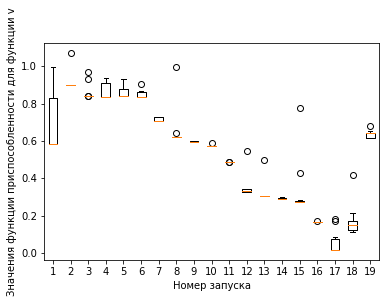

In [31]:
plt.boxplot(hiss_v)
plt.ylabel("Значения функции приспособленности для функции v")
plt.xlabel('Номер запуска')

Text(0.5, 0, 'Номер запуска')

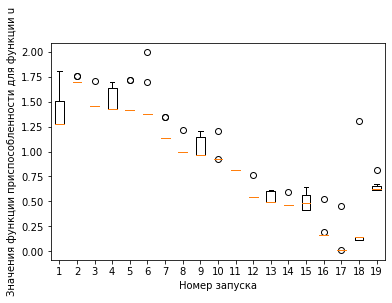

In [32]:
plt.boxplot(hiss_u)
plt.ylabel("Значения функции приспособленности для функции u")
plt.xlabel('Номер запуска')

In [26]:
hiss = np.load('polynomial_system_data.npy')
hiss_u = []
hiss_v = []
for i in hiss:
    hiss_u.append(i[::2])
    hiss_v.append(i[1::2])

In [50]:
np.save('polynomial_system_data.npy', hiss)

In [19]:
du = np.load('du.npy')
dv = np.load('dv.npy')

In [20]:
%%time
t = np.load('t.npy')
data = np.load('data.npy')
x = data[:, 0]; y = data[:, 1]
err_pd_u=[]
err_pd_v=[]
for i in np.arange(3,1000,20)[::-1]:
    p_u= pd(data = x,grid = [t],max_order = 1, mp_poolsize = 5, polynomial_window = i, poly_order = None)
    p_v= pd(data = y,grid = [t],max_order = 1, mp_poolsize = 5, polynomial_window = i, poly_order = None)
    err_u = np.linalg.norm(du[100:900]-p_u.T[0][100:900])
    err_v = np.linalg.norm(dv[100:900]-p_v.T[0][100:900])
    err_pd_u.append(err_u)
    err_pd_v.append(err_v)
err_1 = np.array(err_pd_u)
err_2 = np.array(err_pd_v)

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
Wall time: 6min 7s


In [12]:
err_pd_v

[0.4558095050840112,
 0.5349654739987248,
 0.7857015395939542,
 1.3028216614840518,
 1.8152555645533992,
 2.857942280591255,
 3.281709303466926,
 3.5005062331847463,
 3.5921521491482356,
 3.6146781660593694,
 3.6194334587833987,
 3.6222332301190487,
 3.6315383310189495,
 3.6677506990035273,
 3.7876763332990864,
 4.000186001603826,
 4.424664718226968,
 4.841836501324145,
 4.990904811354634,
 5.070063383123679,
 5.088828536584913,
 5.091089567842814,
 5.092076662828856,
 5.0990394145233395,
 5.125173584848234,
 5.20631010935586,
 5.376051397791066,
 5.607143461635905,
 6.02853348012514,
 6.131948155675368,
 6.1931974524418,
 6.199040784497356,
 6.1894699153946915,
 6.180988814923034,
 6.184009458889371,
 6.218599435042585,
 6.327329049558452,
 6.556252014078028,
 6.809506212505142,
 7.189016096637467,
 7.098833050125772,
 6.92314792639677,
 6.736310203562574,
 6.543148820103391,
 6.307622070221875,
 5.89786615313925,
 5.131892659181264,
 3.761234055804569,
 1.665674868153426,
 2.71090108

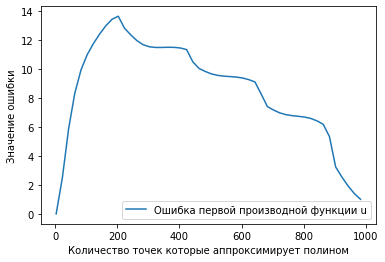

In [23]:
# err_pd_u = np.load('poly_ode_data_1.npy')
# err_pd_v = np.load('poly_ode_data_2.npy')
plt.plot(np.arange(3,1000,20)[::-1], err_pd_u, label = 'Ошибка первой производной функции u')
plt.ylabel('Значение ошибки')
plt.xlabel('Количество точек которые аппроксимирует полином')
plt.legend()

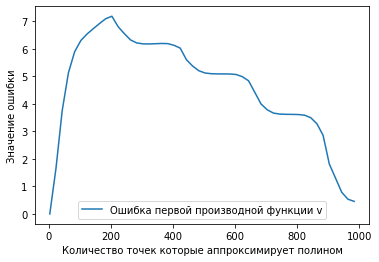

In [24]:
plt.plot(np.arange(3,1000,20)[::-1], err_pd_v, label = 'Ошибка первой производной функции v')
plt.ylabel('Значение ошибки')
plt.xlabel('Количество точек которые аппроксимирует полином')
plt.legend()

In [3]:
#ДУ с ЧП

%%time
t = np.linspace(0, 1, 101)#[:100]
x = np.linspace(0, 1, 101)#[:100]
v = np.loadtxt('wave_sln_100.csv', delimiter = ',')#.T[:100][:,:100]
grids = np.meshgrid(t, x, indexing='ij')
hiss = []
for i in range(11,101,10):
    print(str(i)*20)
    one_stage_hiss = []
    minn = np.array([])
    for j in range(6):
        print(str(j)*30)
        epde_search_obj4 = epde_alg.epde_search(use_solver = False, dimensionality = 1, boundary = 20 ,coordinate_tensors = grids,
                                                    verbose_params = {'show_moeadd_epochs' : True})
        custom_grid_tokens = CacheStoredTokens(token_type = 'grid',
                                            token_labels = ['t', 'x'],
                                            token_tensors={'t' : grids[0], 'x' : grids[1]},
                                            params_ranges = {'power' : (1, 1)},
                                            params_equality_ranges = None)
        trig_tokens = TrigonometricTokens(dimensionality = 1)
        factors_max_number = {'factors_num' : [1, 2], 'probas' : [0.8, 0.2]}
        epde_search_obj4.set_moeadd_params(population_size=5, training_epochs =15)
        epde_search_obj4.set_preprocessor(default_preprocessor_type='poly', preprocessor_kwargs={'polynomial_window':i})
        epde_search_obj4.fit(data = v, max_deriv_order=(2, 2),  equation_terms_max_number = 4, equation_factors_max_number = factors_max_number,coordinate_tensors = [t,],
                                eq_sparsity_interval = (1e-8, 1e-4),additional_tokens = [custom_grid_tokens,trig_tokens,])
        epde_search_obj4.equation_search_results(only_print = True)
        one_stage_hiss.append(epde_search_obj4.optimizer.history)
    for k in one_stage_hiss:
        print(type(fitness_value_extractor_1d(k)))
        print(fitness_value_extractor_1d(k))
        if set(fitness_value_extractor_1d(k)) == set():
            continue
        minn = np.append(minn, np.amin(fitness_value_extractor_1d(k)))
    hiss.append(minn)

1111111111111111111111111111111111111111
000000000000000000000000000000
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002A284DCCFD0>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x000002A284DCCFD0>
trig_token_params : VALUES = (0, 1)
Deriv orders after definition [[None], [0], [0, 0], [1], [1, 1]]
10201
initial_shape (101, 101) derivs_tensor.shape (10201, 4)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [7.30203041e-08]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [5.64846275e-07]
New solution accepted, confirmed 2/5 solutio

During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weigh

initial_shape (101, 101) derivs_tensor.shape (10201, 4)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [1.73755571e-08]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [1.26257459e-08]
New solution accepted, confirmed 2/5 solutions.
Creating new equation, sparsity value [6.4391285e-07]
New solution accepted, confirmed 3/5 solutions.
Creating new equation, sparsity value [1.61534196e-06]
New solution accepted, confirmed 4/5 solutions.
Creating new equation, sparsity value [6.79297838e-05]
New solution accepted, confirmed 5/5 solutions.
best_obj 2
Multiobjective optimization : 0-th epoch.
During MO : processing 0-th weig

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.06577032436389839 * u{power: 1.0} + 4.718447854656915e-16 * du/dx1{power: 1.0} + 0.042133961242788 * d^2u/dx1^2{power: 1.0} + -0.22015877729504832 = d^2u/dx2^2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.0002878202440766316}} , with objective function values of [0.56846581 4.        ] 

0.04223096779900183 * d^2u/dx1^2{power: 1.0} + -7.421501837295792e-05 * u{power: 1.0} * d^2u/dx1^2{power: 1.0} + 0.054254262840307814 * u{power: 1.0} + -0.181170688057878 = d^2u/dx2^2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 2.120284165322657e-05}} , with

initial_shape (101, 101) derivs_tensor.shape (10201, 4)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [1.72411873e-08]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [2.66995914e-08]
New solution accepted, confirmed 2/5 solutions.
Creating new equation, sparsity value [2.77168528e-08]
New solution accepted, confirmed 3/5 solutions.
Creating new equation, sparsity value [1.4025618e-07]
New solution accepted, confirmed 4/5 solutions.
Creating new equation, sparsity value [2.79626196e-05]
New solution accepted, confirmed 5/5 solutions.
[0.14, 0.86] [[0.92, 0.07999999999999996], [0.48, 0.52], [0.14, 0.86], [0.9, 0.099999

During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight

Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th w

initial_shape (101, 101) derivs_tensor.shape (10201, 4)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [1.46501277e-08]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [1.61745621e-07]
New solution accepted, confirmed 2/5 solutions.
Creating new equation, sparsity value [2.21258969e-06]
New solution accepted, confirmed 3/5 solutions.
Creating new equation, sparsity value [9.04190959e-08]
New solution accepted, confirmed 4/5 solutions.
Creating new equation, sparsity value [3.30079858e-06]
New solution accepted, confirmed 5/5 solutions.
[0.32, 0.6799999999999999] [[0.32, 0.6799999999999999]]
[0.9400000000000001, 0.05999

Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.0 * du/dx1{power: 1.0} + 0.8106701513735732 * du/dx2{power: 1.0} + 0.007607148113709626 * d^2u/dx1^2{power: 1.0} + -0.054429283745781945 = d^2u/dx2^2{power: 1.0} * x{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.00042928872229465204}} , with objective function values of [3.83289396 4.        ] 

0.06130535970852927 * du/dx2{power: 1.0} + 0.0 * du/dx1{power: 1.0} + 0.041741863146929674 * d

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th 

10201
initial_shape (101, 101) derivs_tensor.shape (10201, 4)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [3.9292094e-07]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [2.94929425e-05]
New solution accepted, confirmed 2/5 solutions.
Creating new equation, sparsity value [6.07992442e-05]
New solution accepted, confirmed 3/5 solutions.
Creating new equation, sparsity value [1.05474243e-07]
New solution accepted, confirmed 4/5 solutions.
Creating new equation, sparsity value [4.77868644e-05]
New solution accepted, confirmed 5/5 solutions.
[0.68, 0.31999999999999995] [[0.68, 0.31999999999999995], [0.14, 0.86], [0.46, 

During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weig

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.942708599582865 * d^2u/dx2^2{power: 1.0} + 1.0572182075397039 * u{power: 1.0} + -0.6939555486064821 * u{power: 1.0} * x{power: 1.0} + -2.14135682358452 = du/dx2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.0002272147393646143}} , with objective function values of [2.50328051 5.        ] 

0.0 * d^2u/dx2^2{power: 1.0} * sin{power: 1.0, freq: 2.885041887513059, dim: 1.0} + 0.5000000000000009 * du/dx2{power: 1.0} + 0.0 * u{power: 1.0} * cos{power: 1.0, freq: 4.275728205168246, dim: 0.0} + -9.63399822636185e-17 = du/dx2{power: 1.0} * t{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_facto

initial_shape (101, 101) derivs_tensor.shape (10201, 4)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [1.95918875e-07]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [3.34319955e-08]
New solution accepted, confirmed 2/5 solutions.
Creating new equation, sparsity value [6.59534054e-06]
New solution accepted, confirmed 3/5 solutions.
Creating new equation, sparsity value [1.75823837e-08]
Creating new equation, sparsity value [7.3470158e-06]
New solution accepted, confirmed 4/5 solutions.
Creating new equation, sparsity value [9.20892836e-05]
New solution accepted, confirmed 5/5 solutions.
best_obj 2
Multiobjective opti

During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epo

initial_shape (101, 101) derivs_tensor.shape (10201, 4)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [3.21957961e-08]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [1.30936087e-05]
New solution accepted, confirmed 2/5 solutions.
Creating new equation, sparsity value [1.25973618e-05]
New solution accepted, confirmed 3/5 solutions.
Creating new equation, sparsity value [4.82373762e-08]
New solution accepted, confirmed 4/5 solutions.
Creating new equation, sparsity value [2.08954575e-08]
New solution accepted, confirmed 5/5 solutions.
best_obj 2
Multiobjective optimization : 0-th epoch.
During MO : processing 0-th wei

During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoc

During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.4321014878154228 * d^2u/dx2^2{power: 1.0} + 0.8141496200603349 * du/dx2{power: 1.0} + 0.34498388172044925 * u{power: 1.0} + -1.1742299870369948 = d^2u/dx2^2{power: 1.0} * x{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 4.649645951029713e-05}} , with objective function values of [2.37853649 5.        ] 

0.9426380373550359 * du/dx2{power: 1.0} + 0.0 * du/dx1{power: 1.0} + 0.0 * u{power: 1.0} + -0.008195097277897431 = du/dx2{power: 1.0} * sin{power: 1.0, freq: 3.208817398438613, dim: 0.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True,

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Mult

During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th e

initial_shape (101, 101) derivs_tensor.shape (10201, 4)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [1.9529951e-06]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [6.02547566e-08]
New solution accepted, confirmed 2/5 solutions.
Creating new equation, sparsity value [5.90199278e-06]
New solution accepted, confirmed 3/5 solutions.
Creating new equation, sparsity value [3.88754999e-08]
New solution accepted, confirmed 4/5 solutions.
Creating new equation, sparsity value [4.14454651e-05]
New solution accepted, confirmed 5/5 solutions.
best_obj 2
Multiobjective optimization : 0-th epoch.
During MO : processing 0-th weig

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.9469388120677142 * du/dx2{power: 1.0} + 0.0 * d^2u/dx2^2{power: 1.0} * u{power: 1.0} + 0.0 * d^2u/dx1^2{power: 1.0} * d^2u/dx2^2{power: 1.0} + -0.007044564898223298 = du/dx2{power: 1.0} * sin{power: 1.0, freq: 2.9304586796765073, dim: 0.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 3.6462280922727494e-05}} , with objective function values of [3.00935552 3.        ] 

0.0 * d^2u/dx2^2{power: 1.0} + 0.9469388120677142 * du/dx2{power: 1.0} + 0.0 * u{power: 1.0} + -0.007044564898223298 = du/dx2{power: 1.0} * sin{power: 1.0, freq: 2.9304586796765073, dim: 0.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'pr

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.


initial_shape (101, 101) derivs_tensor.shape (10201, 4)
creating TokenFamily entry u
self.tokens is ['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
Here, derivs order is {'u': [None], 'du/dx1': [0], 'd^2u/dx1^2': [0, 0], 'du/dx2': [1], 'd^2u/dx2^2': [1, 1]}
['u', 'du/dx1', 'd^2u/dx1^2', 'du/dx2', 'd^2u/dx2^2']
The cardinality of defined token pool is [5 2 2]
Among them, the pool contains [5]
Creating new equation, sparsity value [1.30395343e-06]
New solution accepted, confirmed 1/5 solutions.
Creating new equation, sparsity value [1.69031752e-07]
New solution accepted, confirmed 2/5 solutions.
Creating new equation, sparsity value [1.87529806e-07]
New solution accepted, confirmed 3/5 solutions.
Creating new equation, sparsity value [3.90547271e-05]
New solution accepted, confirmed 4/5 solutions.
Creating new equation, sparsity value [6.9139525e-07]
New solution accepted, confirmed 5/5 solutions.
best_obj 2
Multiobjective optimization : 0-th epoch.
During MO : processing 0-th weig

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 6-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 7-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 8-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 9-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

The optimization has been conducted.


0-th non-dominated level


0.49999999999999994 * du/dx2{power: 1.0} + 0.0 * u{power: 1.0} + 0.0 * d^2u/dx1^2{power: 1.0} + -3.219511369634295e-17 = du/dx2{power: 1.0} * t{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.0001640685676877879}} , with objective function values of [4.88844463 3.        ] 

1.1947983517447005 * d^2u/dx2^2{power: 1.0} * x{power: 1.0} + -0.4145353447038884 * u{power: 1.0} + -0.5083749307218378 * d^2u/dx2^2{power: 1.0} + 1.41038703913969 = du/dx2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 3.286753128719383e-05}} , with objective function values of [2.81197798 5.        ] 

<class 'n

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 4-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.9083176243338129 * d^2u/dx2^2{power: 1.0} + 1.0060381195689694 * u{power: 1.0} + -0.6792158715807356 * u{power: 1.0} * x{power: 1.0} + -2.0099276150091114 = du/dx2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.0 * du/dx1{power: 1.0} + 0.18211630267054285 * d^2u/dx2^2{power: 1.0} + 0.8076059059068375 * du/dx2{power: 1.0} + -0.047578475677280796 = d^2u/dx2^2{power: 1.0} * x{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimiza

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 10-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 11-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 12-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 13-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 14-th 

During MO : processing 3-th weight.
During MO : processing 4-th weight.
The optimization has been conducted.


0-th non-dominated level


0.0 * d^2u/dx1^2{power: 1.0} + 0.9451414288678203 * du/dx2{power: 1.0} + 0.0 * u{power: 1.0} * x{power: 1.0} + -0.006688990091938925 = du/dx2{power: 1.0} * sin{power: 1.0, freq: 2.8634896134800445, dim: 0.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimizable': True, 'value': 0.0001290350137113487}} , with objective function values of [3.12557238 3.        ] 

1.0183490075654942 * du/dx2{power: 1.0} + -1.1272235007375715 * u{power: 1.0} + 0.6977476857476579 * u{power: 1.0} * x{power: 1.0} + 2.3611265947071933 = d^2u/dx2^2{power: 1.0}
{'terms_number': {'optimizable': False, 'value': 4}, 'max_factors_in_term': {'optimizable': False, 'value': {'factors_num': [1, 2], 'probas': [0.8, 0.2]}}, ('sparsity', 'u'): {'optimiza

During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 5-th epoch.
During MO : processing 0-th weight

Text(0.5, 0, 'Номер запуска')

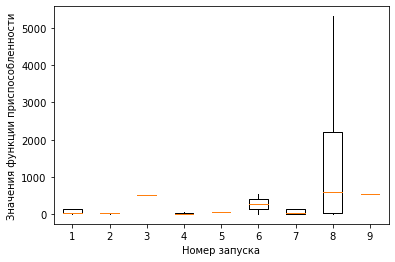

In [34]:
plt.boxplot(system_hiss[::-1],showcaps=False,showfliers = False)
plt.ylabel("Значения функции приспособленности")
plt.xlabel('Номер запуска')

In [5]:
np.save('poly_wave_hiss.npy',hiss)

In [33]:
system_hiss = np.load('poly_wave_hiss.npy',allow_pickle=True)

In [17]:
v.shape

(101, 101)

In [29]:
t = np.linspace(0, 1, 101)
x = np.linspace(0, 1, 101)
grids = np.meshgrid(t, x, indexing='ij')
p_der = pd(data = v,grid = grids,max_order = (2,2), mp_poolsize = 4, polynomial_window = 9, poly_order = None)
p_der.shape

10201


(10201, 4)

In [37]:
dx = np.load('d_dxwaxe.npy')
dt = np.load('d_dtwave.npy') 
d2x = np.load('d2_dx2wave.npy')
d2t = np.load('d2_dt2wave.npy')

In [55]:
t = np.linspace(0, 1, 101)
x = np.linspace(0, 1, 101)
grids = np.meshgrid(t, x, indexing='ij')
v = np.loadtxt('wave_sln_100.csv', delimiter = ',')
dx = np.load('d_dxwaxe.npy')
dt = np.load('d_dtwave.npy') 
d2x = np.load('d2_dx2wave.npy')
d2t = np.load('d2_dt2wave.npy')
err_1x = []
err_1t = []
err_2x = []
err_2t = []
for i in range(10,100):
    p_u= pd(data = v,grid = grids,max_order = 2, mp_poolsize = 5, polynomial_window = i, poly_order = None)
    err1x = np.linalg.norm((p_u.T[0].reshape((101,101)) - dx).flatten())
    err2x = np.linalg.norm((p_u.T[1].reshape((101,101)) - d2x).flatten())
    err1t = np.linalg.norm((p_u.T[2].reshape((101,101)) - dt).flatten())
    err2t = np.linalg.norm((p_u.T[3].reshape((101,101)) - d2t).flatten())
    err_1t.append(err1t)
    err_1x.append(err1x)
    err_2t.append(err2t)
    err_2x.append(err2x)
err_1t

10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201
10201


[1.204495560453958,
 1.2045976718783455,
 1.2264314313801628,
 1.2265897435129158,
 1.247613605820257,
 1.2478031202692024,
 1.268068378359507,
 1.2682867826736857,
 1.2877082773709825,
 1.2879823145780225,
 1.306673541714338,
 1.3070343748515016,
 1.3250578378061861,
 1.3255385924877374,
 1.3429178476071584,
 1.3435472006130689,
 1.3602606230354801,
 1.3610571289921785,
 1.3770882947699807,
 1.3780750314727963,
 1.3934686106883185,
 1.3946770124811056,
 1.4095157475178646,
 1.4109800536066381,
 1.4253002523485954,
 1.4270623647586578,
 1.4408589432475214,
 1.4429673513083487,
 1.4562115361698018,
 1.4587165429286357,
 1.471398023018464,
 1.4743544434938118,
 1.486503411978687,
 1.489972207292859,
 1.5016287343981878,
 1.505676786014265,
 1.5168375098301097,
 1.5215342882850291,
 1.5321700539464993,
 1.5375860981902847,
 1.5476720654190763,
 1.5538819465710638,
 1.563429653471461,
 1.570507594112634,
 1.5794903682817285,
 1.5875073661235164,
 1.5958716536012199,
 1.604896191124078,
 1.

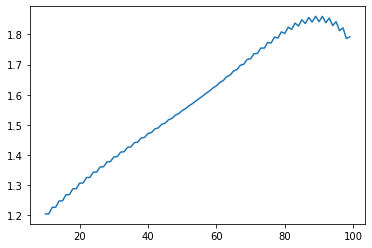

In [56]:
plt.plot(np.arange(10,100),err_1t)

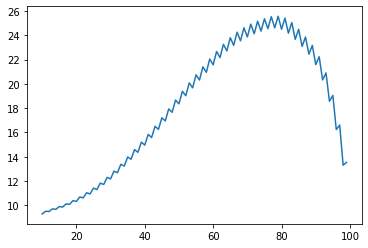

In [57]:
plt.plot(np.arange(10,100),err_2t)

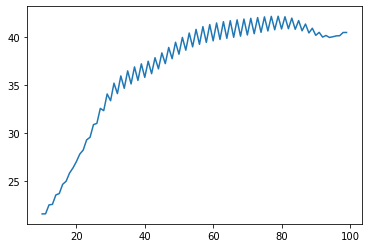

In [58]:
plt.plot(np.arange(10,100),err_1x)

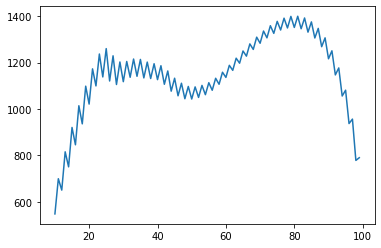

In [59]:
plt.plot(np.arange(10,100),err_2x)

In [5]:
t = np.linspace(0, 1, 101)#[:100]
x = np.linspace(0, 1, 101)#[:100]
v = np.loadtxt('wave_sln_100.csv', delimiter = ',')#.T[:100][:,:100]
grids = np.meshgrid(t, x, indexing='ij')

epde_search_obj4 = epde_alg.epde_search(use_solver = False, dimensionality = 1, boundary = 20 ,coordinate_tensors = grids,
                                                    verbose_params = {'show_moeadd_epochs' : True})
custom_grid_tokens = CacheStoredTokens(token_type = 'grid',
                                            token_labels = ['t', 'x'],
                                            token_tensors={'t' : grids[0], 'x' : grids[1]},
                                            params_ranges = {'power' : (1, 1)},
                                            params_equality_ranges = None)
trig_tokens = TrigonometricTokens(dimensionality = 1)
factors_max_number = {'factors_num' : [1, 2], 'probas' : [0.8, 0.2]}
epde_search_obj4.set_moeadd_params(population_size=5, training_epochs =15)
epde_search_obj4.set_preprocessor(default_preprocessor_type='ANN', preprocessor_kwargs={'epochs_max':1e3})
epde_search_obj4.fit(data = v, max_deriv_order=(2, 2),  equation_terms_max_number = 3, equation_factors_max_number = factors_max_number,coordinate_tensors = [t,],
                                eq_sparsity_interval = (1e-8, 1e-4),additional_tokens = [custom_grid_tokens,trig_tokens,])
epde_search_obj4.equation_search_results(only_print = True)
one_stage_hiss.append(epde_search_obj4.optimizer.history)

setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000015B4CD7B760>
setting builder with <epde.moeadd.moeadd_strategy_elems.SectorProcesserBuilder object at 0x0000015B4CD7B760>
trig_token_params : VALUES = (0, 1)
Deriv orders after definition [[None], [0], [0, 0], [1], [1, 1]]
Surface training t=0, loss=3.334918737411499
Surface training t=1, loss=3.249058961868286
Surface training t=2, loss=3.1723580360412598
Surface training t=3, loss=3.108920454978943
Surface training t=4, loss=3.0427112579345703
Surface training t=5, loss=2.963092565536499
Surface training t=6, loss=2.898588180541992
Surface training t=7, loss=2.8039982318878174
Surface training t=8, loss=2.788968801498413
Surface training t=9, loss=2.6956140995025635
Surface training t=10, loss=2.5934683084487915
Surface training t=11, loss=2.5383970737457275
Surface training t=12, loss=2.4755154848098755
Surface training t=13, loss=2.38227915763855
Surface training t=14, loss=2.29885625839

Surface training t=168, loss=0.22817710041999817
Surface training t=169, loss=0.22027426213026047
Surface training t=170, loss=0.2143341824412346
Surface training t=171, loss=0.20969272404909134
Surface training t=172, loss=0.2034459337592125
Surface training t=173, loss=0.19675294309854507
Surface training t=174, loss=0.19205999374389648
Surface training t=175, loss=0.18496879935264587
Surface training t=176, loss=0.1786087304353714
Surface training t=177, loss=0.1722107157111168
Surface training t=178, loss=0.16490381211042404
Surface training t=179, loss=0.15832877159118652
Surface training t=180, loss=0.15316493809223175
Surface training t=181, loss=0.1464439332485199
Surface training t=182, loss=0.14092788845300674
Surface training t=183, loss=0.13641782104969025
Surface training t=184, loss=0.130999393761158
Surface training t=185, loss=0.12245942652225494
Surface training t=186, loss=0.11848313361406326
Surface training t=187, loss=0.11445756256580353
Surface training t=188, los

Surface training t=336, loss=0.05989113077521324
Surface training t=337, loss=0.0593101941049099
Surface training t=338, loss=0.059702884405851364
Surface training t=339, loss=0.059257617220282555
Surface training t=340, loss=0.05860097520053387
Surface training t=341, loss=0.05923357978463173
Surface training t=342, loss=0.060170797631144524
Surface training t=343, loss=0.05959521792829037
Surface training t=344, loss=0.05872186832129955
Surface training t=345, loss=0.05843949504196644
Surface training t=346, loss=0.0587528720498085
Surface training t=347, loss=0.05825645290315151
Surface training t=348, loss=0.05828374624252319
Surface training t=349, loss=0.058108314871788025
Surface training t=350, loss=0.059509677812457085
Surface training t=351, loss=0.059316497296094894
Surface training t=352, loss=0.05890071392059326
Surface training t=353, loss=0.058548880741000175
Surface training t=354, loss=0.058546047657728195
Surface training t=355, loss=0.06107253581285477
Surface traini

Surface training t=503, loss=0.05252524092793465
Surface training t=504, loss=0.05527280643582344
Surface training t=505, loss=0.0533873550593853
Surface training t=506, loss=0.05166545882821083
Surface training t=507, loss=0.05452272854745388
Surface training t=508, loss=0.05174020864069462
Surface training t=509, loss=0.05161142349243164
Surface training t=510, loss=0.0523866843432188
Surface training t=511, loss=0.05379200726747513
Surface training t=512, loss=0.050813956186175346
Surface training t=513, loss=0.0520770438015461
Surface training t=514, loss=0.052235858514904976
Surface training t=515, loss=0.05418996140360832
Surface training t=516, loss=0.05225236527621746
Surface training t=517, loss=0.05242701806128025
Surface training t=518, loss=0.05176461860537529
Surface training t=519, loss=0.051399264484643936
Surface training t=520, loss=0.05343903973698616
Surface training t=521, loss=0.05133284069597721
Surface training t=522, loss=0.052394963800907135
Surface training t=

Surface training t=670, loss=0.04962763376533985
Surface training t=671, loss=0.04960095137357712
Surface training t=672, loss=0.05072229355573654
Surface training t=673, loss=0.05140737071633339
Surface training t=674, loss=0.05094199627637863
Surface training t=675, loss=0.0501372367143631
Surface training t=676, loss=0.049742721021175385
Surface training t=677, loss=0.04911476559937
Surface training t=678, loss=0.04953625425696373
Surface training t=679, loss=0.0524623841047287
Surface training t=680, loss=0.052415756508708
Surface training t=681, loss=0.05016000010073185
Surface training t=682, loss=0.05234906077384949
Surface training t=683, loss=0.05087990313768387
Surface training t=684, loss=0.0508140679448843
Surface training t=685, loss=0.0508549939841032
Surface training t=686, loss=0.049099572002887726
Surface training t=687, loss=0.050365032628178596
Surface training t=688, loss=0.05026056990027428
Surface training t=689, loss=0.05277395062148571
Surface training t=690, lo

Surface training t=837, loss=0.050010230392217636
Surface training t=838, loss=0.05099789798259735
Surface training t=839, loss=0.0509885773062706
Surface training t=840, loss=0.048771852627396584
Surface training t=841, loss=0.049858348444104195
Surface training t=842, loss=0.04927408881485462
Surface training t=843, loss=0.048723254352808
Surface training t=844, loss=0.04940927028656006
Surface training t=845, loss=0.04931974411010742
Surface training t=846, loss=0.048554131761193275
Surface training t=847, loss=0.049031296744942665
Surface training t=848, loss=0.04850893095135689
Surface training t=849, loss=0.04974617250263691
Surface training t=850, loss=0.04891183786094189
Surface training t=851, loss=0.05013797990977764
Surface training t=852, loss=0.05007666349411011
Surface training t=853, loss=0.049340035766363144
Surface training t=854, loss=0.04909780994057655
Surface training t=855, loss=0.048809267580509186
Surface training t=856, loss=0.049697430804371834
Surface trainin

During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 1-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 2-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 3-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
During MO : processing 4-th weight.
Multiobjective optimization : 4-th epoch.
During MO : processing 0-th weight.
During MO : processing 1-th weight.
During MO : processing 2-th weight.
During MO : processing 3-th weight.
Duri

NameError: name 'one_stage_hiss' is not defined

In [6]:
epde_search_obj4.optimizer.history

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], []]